In [1]:
# Importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pylab import rcParams
rcParams['figure.figsize']=(12,6)
sns.set()

In [2]:
# Importing the dataset
data= pd.read_csv("indian_food.csv")
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [3]:
# Checking the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


### Column Description
* name : name of the dish

* ingredients : main ingredients used

* diet : type of diet - either vegetarian or non vegetarian

* prep_time : preparation time

* cook_time : cooking time

* flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc

* course : course of meal - starter, main course, dessert, etc

* state : state where the dish is famous or is originated

* region : region where the state belongs


In [4]:
## Checking for null values
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

### Exploratory Data Ananlysis

In [5]:
# converting the "Name" column letters to lowercase
data['name']= data['name'].str.lower()

# Removing the spaces between words
data['name']=data['name'].str.strip()

##### Going through each column

In [6]:
# Ingredients
data['diet'].value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

In [7]:
# flavor_profile
data['flavor_profile'].value_counts()

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [8]:
# Course
data['course'].value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [9]:
# State
data['state'].value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
-1                 24
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Madhya Pradesh      2
Jammu & Kashmir     2
Tripura             1
Nagaland            1
Uttarakhand         1
Chhattisgarh        1
NCT of Delhi        1
Haryana             1
Name: state, dtype: int64

In [10]:
# Region
data['region'].value_counts()

West          74
South         59
North         49
East          31
North East    25
-1            13
Central        3
Name: region, dtype: int64

#### Observation

In [11]:
data[data.region.isna()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [12]:
# Uttar Pradesh comes in North region on the basis of below observation.

In [13]:
data.loc[data.state == "Uttar Pradesh"].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,petha,"Firm white pumpkin, sugar, kitchen lime, alum ...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,kachori,"Moong dal, rava, garam masala, dough, fennel s...",vegetarian,30,60,spicy,snack,Uttar Pradesh,North


In [14]:
# Filling the NaN value with "North" in region

In [15]:
data.region.fillna("North", inplace=True)

#### EDA of Diet

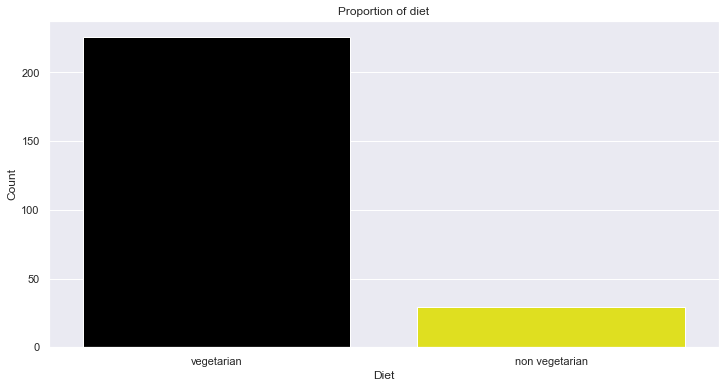

In [16]:
# Looking at diet column
sns.countplot(data=data, x="diet", palette=["black", "yellow"])
plt.xlabel("Diet")
plt.ylabel("Count")
plt.title("Proportion of diet")
plt.show()

##### Observation: Vegetarian dishes is more in number than than Non-Vegetarian

#### EDA of flavor_profile

In [17]:
data["flavor_profile"].value_counts()

spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [18]:
# Replacing -1 in "flavor_profile" with other
data["flavor_profile"]= data["flavor_profile"].replace("-1", "other")

In [19]:
data["flavor_profile"].value_counts()

spicy     133
sweet      88
other      29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

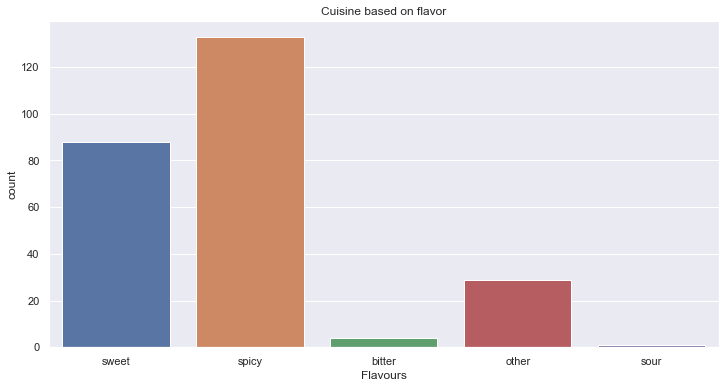

In [20]:
sns.countplot(data=data, x="flavor_profile")
plt.xlabel("Flavours")
plt.title("Cuisine based on flavor")
plt.show()

##### Observation: Indians like spicy and sweet flavours.

#### EDA of course

In [21]:
data['course'].value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

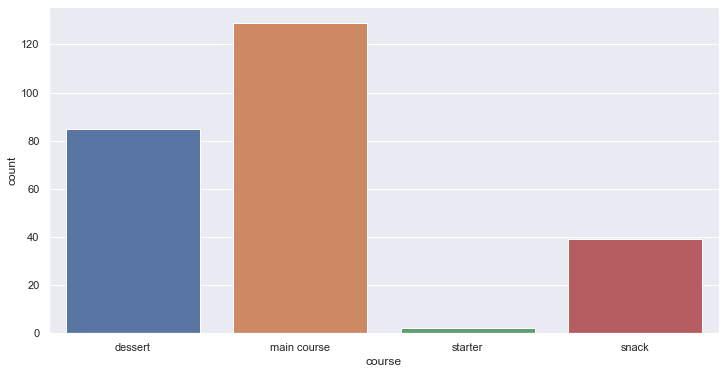

In [22]:
sns.countplot(data=data, x="course")
plt.show()

##### Observation: Dishes in "Main Course" and "Desert" are more in count.

#### EDA of State 

In [23]:
data['state'].value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
-1                 24
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Madhya Pradesh      2
Jammu & Kashmir     2
Tripura             1
Nagaland            1
Uttarakhand         1
Chhattisgarh        1
NCT of Delhi        1
Haryana             1
Name: state, dtype: int64

In [24]:
# Rows where state is -1

data.loc[data.state == "-1"].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
9,kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1
10,laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,-1
12,nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,-1
94,khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1


In [25]:
# As all these dishes are available all over the country, we can replace them with All States

In [26]:
data.state= data.state.replace("-1", "All State")

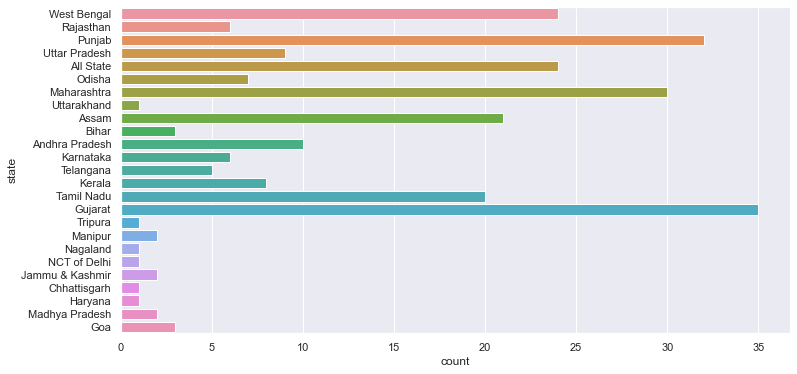

In [27]:
# Number of dishes that are famous in various states or all over India
sns.countplot(data=data, y='state')
plt.show()

##### Observation: Gujurat has highest number of famous cuisines

<br>

#### EDA of Region

In [28]:
data['region'].value_counts()

West          74
South         59
North         50
East          31
North East    25
-1            13
Central        3
Name: region, dtype: int64

In [29]:
data[data.region == "-1"].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,All State,-1
9,kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,All State,-1
10,laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,All State,-1
12,nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,All State,-1
94,khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,All State,-1


In [30]:
# All these dishes/ cuisine are common all over the country so we can replace "-1" with "All Region"

data['region']= data['region'].replace("-1", "All Region")

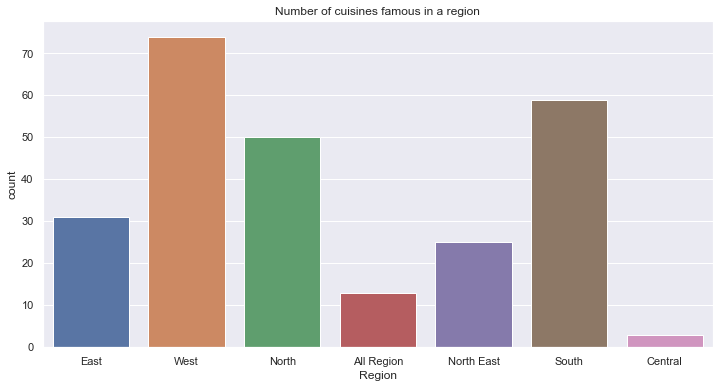

In [31]:
sns.countplot(data= data, x="region")
plt.title("Number of cuisines famous in a region")
plt.xlabel('Region')
plt.show()

#### Observation: Most of the dishes are from west and south region.

<br>

#### EDA of prep time and cook time

In [32]:
# Looking at prep time
data['prep_time'].value_counts()

 10     98
 20     40
-1      30
 15     22
 5      16
 30     12
 25      5
 45      5
 120     5
 240     4
 360     3
 40      3
 180     2
 60      2
 80      1
 70      1
 150     1
 35      1
 480     1
 495     1
 12      1
 500     1
Name: prep_time, dtype: int64

In [33]:
# here -1 is outlier
# looking at rows which contains -1
data[data.prep_time==-1].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
19,sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,-1,60,sweet,dessert,Maharashtra,West
21,chhena kheeri,"Chhena, sugar, milk",vegetarian,-1,60,sweet,dessert,Odisha,East
65,pork bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East
132,kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South


In [34]:
# Looking at cook time
data['cook_time'].value_counts()

 30     59
 20     42
-1      28
 40     27
 60     22
 45     15
 25     13
 50     10
 35      9
 10      7
 90      7
 15      5
 5       3
 120     3
 2       1
 6       1
 55      1
 75      1
 720     1
Name: cook_time, dtype: int64

In [35]:
# here -1 is outlier
# looking at rows which contains -1
data[data.cook_time==-1].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
65,pork bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East
132,kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
148,paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South
152,poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South


<AxesSubplot:xlabel='prep_time', ylabel='cook_time'>

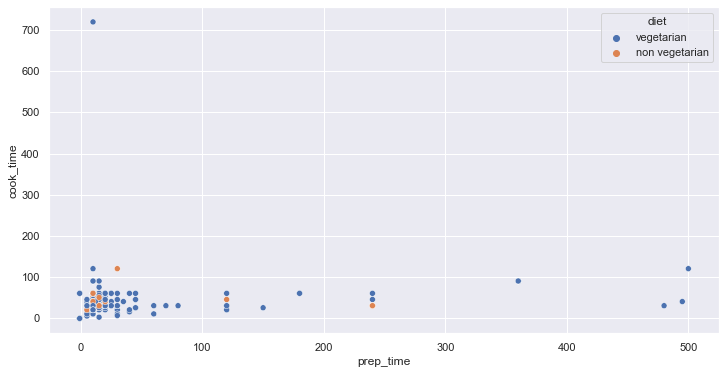

In [36]:
# Plotting cook time and prep time
sns.scatterplot(data= data, x='prep_time', y='cook_time', hue='diet')

#### Observation: Veg and Non-Veg dishes takes almost same time to prepare

### EDA of Ingredients

In [42]:
# let's look at to the ingrediets which are used to make a particular dish

# first let's convert all ingredients into lower case for preventing case sensitive
data.ingredients = data.ingredients.str.lower()
# so here ingredients are a comman seprated
# let's split those ingredits and divide into veg and non-veg proporation

veg_ingredients = data.loc[data.diet == "vegetarian", "ingredients"]
non_veg_ingredients = data.loc[data.diet == "non vegetarian", "ingredients"]

# let's check size of both ingredients and verify the whether the ingredients of all dishes are stored or not
# our total dishes are 255
veg_ingredients.size + non_veg_ingredients.size

255

In [43]:
veg_ingredients.str.split(",")

0                   [maida flour,  yogurt,  oil,  sugar]
1                            [gram flour,  ghee,  sugar]
2      [carrots,  milk,  sugar,  ghee,  cashews,  rai...
3      [flour,  ghee,  kewra,  milk,  clarified butte...
4      [milk powder,  plain flour,  baking powder,  g...
                             ...                        
250          [glutinous rice,  black sesame seeds,  gur]
251    [coconut milk,  egg yolks,  clarified butter, ...
252    [cottage cheese,  dry dates,  dried rose petal...
253    [milk powder,  dry fruits,  arrowroot powder, ...
254    [brown rice,  fennel seeds,  grated coconut,  ...
Name: ingredients, Length: 226, dtype: object

In [44]:
non_veg_ingredients.str.split(",")

64     [fish,  potol,  tomato,  chillies,  ginger,  g...
65     [boiled pork,  onions,  chillies,  ginger and ...
67       [rice,  axone,  salt,  water,  chillies,  pork]
75     [chicken thighs,  basmati rice,  star anise,  ...
76     [chicken,  greek yogurt,  cream,  garam masala...
79     [chicken,  dahi,  sesame seeds,  garam masala ...
80     [naan bread,  tomato sauce,  skinless chicken ...
81     [chicken,  whole wheat bread,  rice flour,  ga...
122    [greek yogurt,  garam masala,  kasuri methi,  ...
123    [chickpea flour,  biryani masala powder,  yogu...
137    [beef,  coconut,  garam masala,  curry leaves,...
163    [meat curry powder,  chicken chunks,  ginger, ...
167    [baingan,  fish,  coconut oil,  fresh coconut,...
172    [bombay duck,  malvani masala,  rice flour,  b...
211    [chicken,  coconut oil,  wine vinegar,  ginger...
223                    [rice,  eggs,  carrot,  beetroot]
225     [potatoes,  mustard oil,  fish,  green chillies]
226    [ridge gourd,  fish,  le

In [45]:
# let's count those ingredients for getting that how many dishes are used that particular ingrediets

# let's remove unnecessary space

veg_ingredients = veg_ingredients.str.strip()
non_veg_ingredients = non_veg_ingredients.str.strip()

veg_cleaned_ingredients = []
non_veg_cleaned_ingredients = []

for i in veg_ingredients.str.split(","): # split by "," & iterate through all the ingredients and append it to list
    veg_cleaned_ingredients += i

for i in non_veg_ingredients.str.split(","):#split by , & iterate through all the ingredients and append it to list
    non_veg_cleaned_ingredients += i

In [46]:
# let's make a series of veg and non veg ingredients

final_veg_ingredients = pd.Series(veg_cleaned_ingredients)
final_non_veg_ingredients = pd.Series(non_veg_cleaned_ingredients)

# let's remove extra spaces
final_veg_ingredients = final_veg_ingredients.str.strip()
final_non_veg_ingredients = final_non_veg_ingredients.str.strip()

# let's count how many time ingredients are repeated and make a data frame
final_veg_ingredients = final_veg_ingredients.value_counts().reset_index()
final_veg_ingredients.columns = ["ingredients", "count"]

final_non_veg_ingredients = final_non_veg_ingredients.value_counts().reset_index()
final_non_veg_ingredients.columns = ["ingredients", "count"]

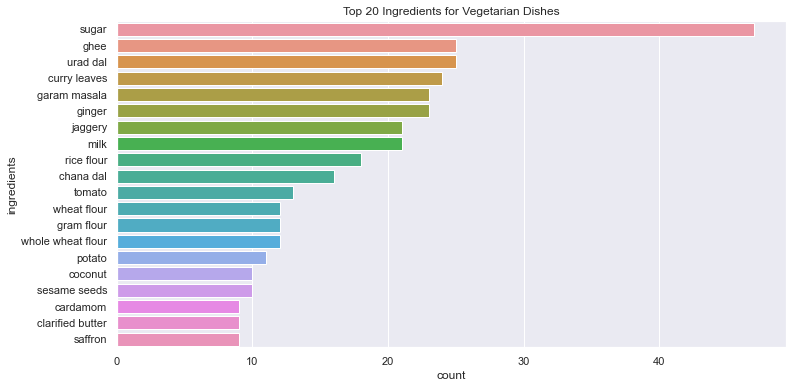

In [47]:
# let's plot a top 20 vegetarian ingredients

sns.barplot(data = final_veg_ingredients.head(20), x = "count", y = "ingredients")
plt.title("Top 20 Ingredients for Vegetarian Dishes")
plt.show()

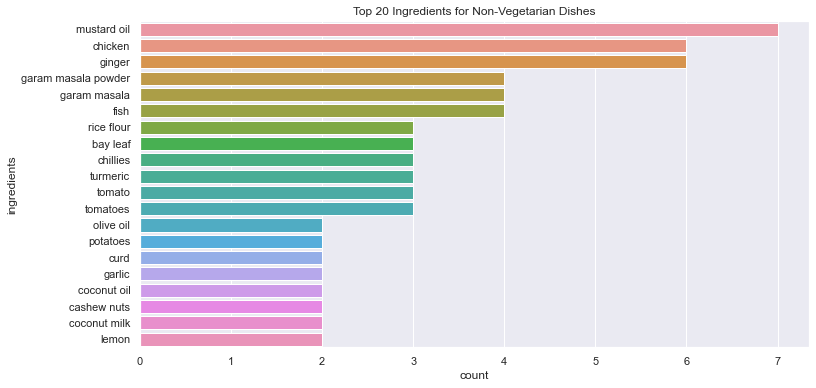

In [48]:
# let's plot top 20 no vegetarian ingredients

sns.barplot(data = final_non_veg_ingredients.head(20), x = "count", y = "ingredients")
plt.title("Top 20 Ingredients for Non-Vegetarian Dishes")
plt.show()

### Feature Engineering 

In [49]:
# Making a copy of main data
data_copy = data.copy()
data_copy.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,gulab jamun,"milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [50]:
# Taking only top 20 ingredients 

top_veg_ingredients = final_veg_ingredients.head(20)
top_non_veg_ingredients = final_non_veg_ingredients.head(20)

# here let's append both and make our final ingredients

final_ingredients = top_veg_ingredients.append(top_non_veg_ingredients).reset_index(drop = True)
final_ingredients.head()

,ingredients,count
0,sugar,47
1,ghee,25
2,urad dal,25
3,curry leaves,24
4,garam masala,23


In [51]:
# Removing deuplicated entries
final_ingredients[final_ingredients.ingredients.duplicated(keep = False)]

,ingredients,count
4,garam masala,23
5,ginger,23
8,rice flour,18
10,tomato,13
22,ginger,6
24,garam masala,4
26,rice flour,3
30,tomato,3


In [52]:
# Merging the duplicated ingredints
final_ingredients = final_ingredients.groupby("ingredients")["count"].sum().reset_index()

# Sorting them by count
final_ingredients = final_ingredients.sort_values("count", ascending = False).reset_index(drop = True)
final_ingredients.head()

,ingredients,count
0,sugar,47
1,ginger,29
2,garam masala,27
3,urad dal,25
4,ghee,25


In [53]:
# Total Ingredients
final_ingredients.ingredients.nunique()

36

In [54]:
for i in final_ingredients.ingredients:
    data_copy[i] = 0 # here i create a column of particular ingredients and assign all value as 0
    data_copy.loc[data_copy.ingredients.str.contains(i), [i]] = 1
    # above i put 1 on that column which dishes has include that particular ingredients

In [55]:
data_copy.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,chillies,bay leaf,garlic,olive oil,coconut milk,lemon,coconut oil,curd,cashew nuts,potatoes
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,0
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,0
2,gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,1,...,0,0,0,0,0,0,0,0,0,0
3,ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,0
4,gulab jamun,"milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Encoding diet column
diet_encoding = pd.get_dummies(data.diet, drop_first=True)
diet_encoding.head()

,vegetarian
0,1
1,1
2,1
3,1
4,1


In [57]:
# now let's concat it with our "data_copy" data frame

data_copy = pd.concat([data_copy, diet_encoding], axis = 1)
data_copy.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,bay leaf,garlic,olive oil,coconut milk,lemon,coconut oil,curd,cashew nuts,potatoes,vegetarian
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,1
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,1


In [58]:
# let's encode flavor_profile using one hot encoding

# here i drop a first column which is bitter for preventing dummy variable trap
flavor_profile_encoding = pd.get_dummies(data.flavor_profile, drop_first=True)
flavor_profile_encoding.head(2)

,other,sour,spicy,sweet
0,0,0,0,1
1,0,0,0,1


In [59]:
# now let's concat it with our main "data" data frame

data_copy = pd.concat([data_copy, flavor_profile_encoding], axis = 1)
data_copy.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,lemon,coconut oil,curd,cashew nuts,potatoes,vegetarian,other,sour,spicy,sweet
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,1,0,0,0,1
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,1,0,0,0,1


In [60]:
# let's encode course using one hot encoding

# here i drop first column which is dessert for preventing dummy variable trap
course_encoding = pd.get_dummies(data.course, drop_first = True)
course_encoding.head(2)

,main course,snack,starter
0,0,0,0
1,0,0,0


In [61]:
# let's concat it with our main "data" data frame

data_copy = pd.concat([data_copy, course_encoding], axis = 1)
data_copy.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,cashew nuts,potatoes,vegetarian,other,sour,spicy,sweet,main course,snack,starter
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,1,0,0,0,1,0,0,0
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,1,0,0,0,1,0,0,0


In [62]:
# let's encode the state using one hot encoding

# here i drop first column which is All State for preventing dummy variable trap
state_encoding = pd.get_dummies(data.state, drop_first = True)
state_encoding.head(2)

,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,Karnataka,Kerala,...,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
# let's concat it with our main "data" data frame

data_copy = pd.concat([data_copy, state_encoding], axis = 1)
data_copy.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,1
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,1,0,0,0,0,0,0


In [64]:
# let's encode region using one hot encoding

# here i drop first column which is All Region for preventing dummy variable trap
region_encoding = pd.get_dummies(data.region, drop_first = True)
region_encoding.head(2)

,Central,East,North,North East,South,West
0,0,1,0,0,0,0
1,0,0,0,0,0,1


In [65]:
# let's concat it with main "data" data frame

data_copy = pd.concat([data_copy, region_encoding], axis = 1)
data_copy.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,1,0,1,0,0,0,0
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,1


In [66]:
# let's create a final data frame
# let's remove unnecessary columns which are not required not and store it as final_data

final_data = data_copy.drop(columns = ['ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'])

final_data.head()

,name,sugar,ginger,garam masala,urad dal,ghee,curry leaves,rice flour,milk,jaggery,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
0,balu shahi,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,boondi,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,gajar ka halwa,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,ghevar,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,gulab jamun,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [67]:
# here i'm going to use Nearest Neighbors using cosine similarity so for model purpose let's take name column
# as a index

final_data.set_index("name", inplace = True)
final_data.head()

,sugar,ginger,garam masala,urad dal,ghee,curry leaves,rice flour,milk,jaggery,chana dal,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
name,,,,,,,,,,,,,,,,,,,,,
balu shahi,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
boondi,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
gajar ka halwa,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
ghevar,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
gulab jamun,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


### Model Building 

In [70]:
# Using Nearest Neighbour for implementing cosine distance 
# Cosine simalrity is noting but a degree between two data points or two similar types of data

from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric = "cosine", algorithm = "auto")
model.fit(final_data)

NearestNeighbors(metric='cosine')

In [71]:
picked_cuisine = final_data.index[np.random.choice(final_data.shape[0])]
picked_cuisine

'double ka meetha'

In [72]:
# now let's find similarity or recommened cuisine using our model
# our model return distance and index
# distance is indicates that how far that similarity of that recommended cuisine with our picked cuisine
# index indicates a index of our final data which is a name of cuisine

# here i want 10 recommended cuisine for my picked cuisine

distance, cuisine_index = model.kneighbors(final_data[final_data.index == picked_cuisine], n_neighbors = 11)

In [73]:
distance

array([[1.11022302e-16, 1.11022302e-16, 8.71290708e-02, 2.00000000e-01,
        2.69703257e-01, 2.69703257e-01, 2.69703257e-01, 3.29179607e-01,
        3.29179607e-01, 4.00000000e-01, 4.00000000e-01]])

In [74]:
cuisine_index

array([[ 41,  52, 120,  51, 149,  47,  40,  44,   9, 253,  33]],
      dtype=int64)

In [77]:
# these are 2D arrays so let's convert it into 1D

distance = distance.flatten()
cuisine_index = cuisine_index.flatten()

# probably first one is always our picked cuisine

print("Recommendation for", picked_cuisine, "are following")

count = 1
for i in range(cuisine_index.size):
    if final_data.index[cuisine_index[i]] == picked_cuisine:
        continue
    print(count, ". ", final_data.index[cuisine_index[i]], " with distance ", distance[i])
    count += 1

Recommendation for double ka meetha are following
1 .  sheer korma  with distance  1.1102230246251565e-16
2 .  shahi tukra  with distance  0.0871290708247231
3 .  qubani ka meetha  with distance  0.20000000000000007
4 .  payasam  with distance  0.26970325665977846
5 .  palathalikalu  with distance  0.26970325665977846
6 .  dharwad pedha  with distance  0.26970325665977846
7 .  kuzhi paniyaram  with distance  0.3291796067500631
8 .  kheer  with distance  0.3291796067500631
9 .  mawa bati  with distance  0.4
10 .  ras malai  with distance  0.4


In [78]:
# let's export our main data for showing data on web app
data.to_csv("cleaned_data.csv", index = False)

# let's export our final_data, it will used on frontend for getting recommendation
final_data.to_csv("model_data.csv")

In [79]:
# let's export model using pickle file

import pickle

with open("model.pickle", "wb") as f:
    pickle.dump(model, f)